In [453]:
import numpy as np
import pandas as pd
import seaborn as sns

import math
from IPython.display import Image

import warnings ; warnings.filterwarnings('ignore')

### 외적 내적
- 외적은 3차원을 만든다.
- 내적과 달리 계산의 한계가 생긴다.
- 벡터라는 것은 현실세계에 존재하는 차원을 나타낼 수 있는데
- 현재는 최대 3개까지 나타낼 수 있다.

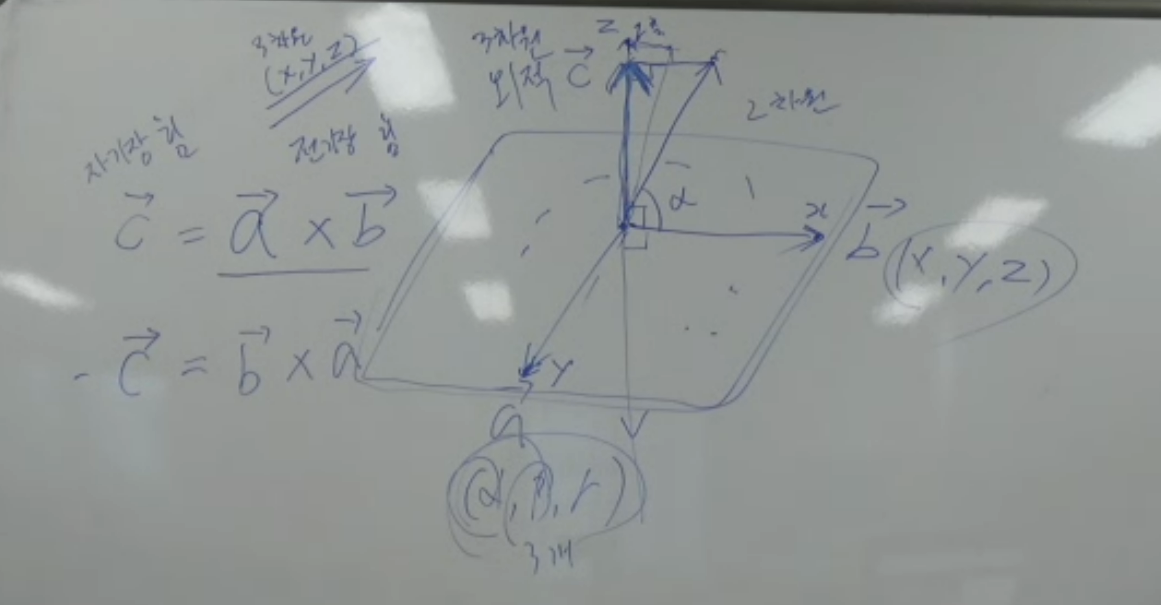

# Series and DataFrame

- series : 1차원적인 개념 ( 벡터 )


- dataframe : 다차원적인 개념 ( 행렬 )

In [454]:
a = [2,4,6,8]

In [455]:
index = ['a','b','c','d']

In [456]:
s = pd.Series(a, index=index)

In [457]:
s

a    2
b    4
c    6
d    8
dtype: int64

- Array 와 같은 개념
- numbers 는 3개의 벡터를 가진다.

In [458]:
numbers = [[1,2,3],[4,5,6],[7,8,9]]
numbers = pd.DataFrame(numbers)

- 데이터프레임의 칼럼과 로우를 정해주지 않으면 자동 갱신된다.

In [459]:
numbers

,0,1,2
0,1,2,3
1,4,5,6
2,7,8,9


In [460]:
order = [["2021-08-01",500,"confirmed"],["2021-08-05",700,"confirmed"],["2021-08-10",200,"canceled"]]
columns = ["datetime", "price", "state"]
order = pd.DataFrame(order, columns=columns)


In [461]:
order

,datetime,price,state
0,2021-08-01,500,confirmed
1,2021-08-05,700,confirmed
2,2021-08-10,200,canceled


In [462]:
tips.shape

(244, 15)

In [463]:
tips["total_bill"]

0      16.99
1      10.34
2      21.01
3      23.68
4      24.59
       ...  
239    29.03
240    27.18
241    22.67
242    17.82
243    18.78
Name: total_bill, Length: 244, dtype: float64

In [464]:
tips

,total_bill,tip,sex,smoker,day,time,size,bill,level,good,bad,customer,total_bill(pre),total_bill(next),index_id
0,16.99,1.01,Female,No,Sun,Dinner,2,15.98,bad,0.0,1.0,non-vip,NaN,10.34,0
1,10.34,1.66,Male,No,Sun,Dinner,3,8.68,bad,0.0,1.0,non-vip,16.99,21.01,2
2,21.01,3.50,Male,No,Sun,Dinner,3,17.51,bad,0.0,1.0,non-vip,10.34,23.68,4
3,23.68,3.31,Male,No,Sun,Dinner,2,20.37,bad,0.0,1.0,non-vip,21.01,24.59,6
4,24.59,3.61,Female,No,Sun,Dinner,4,20.98,bad,0.0,1.0,vip,23.68,25.29,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,23.11,good,1.0,0.0,vip,35.83,27.18,478
240,27.18,2.00,Female,Yes,Sat,Dinner,2,25.18,bad,0.0,1.0,non-vip,29.03,22.67,480
241,22.67,2.00,Male,Yes,Sat,Dinner,2,20.67,bad,0.0,1.0,non-vip,27.18,17.82,482
242,17.82,1.75,Male,No,Sat,Dinner,2,16.07,bad,0.0,1.0,non-vip,22.67,18.78,484


In [465]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   total_bill        244 non-null    float64 
 1   tip               244 non-null    float64 
 2   sex               244 non-null    category
 3   smoker            244 non-null    category
 4   day               244 non-null    category
 5   time              244 non-null    category
 6   size              244 non-null    int64   
 7   bill              244 non-null    float64 
 8   level             244 non-null    object  
 9   good              244 non-null    float64 
 10  bad               244 non-null    float64 
 11  customer          244 non-null    object  
 12  total_bill(pre)   243 non-null    float64 
 13  total_bill(next)  243 non-null    float64 
 14  index_id          244 non-null    object  
dtypes: category(4), float64(7), int64(1), object(3)
memory usage: 22.6+ KB


- isnull : 빈 자리가 몇개인가?
- 데이터의 빈값을 확인하기 위해서
- 보기 좋게 만드는 건데 요게 데이터 전처리작업

In [466]:
tips.isnull().sum()

total_bill          0
tip                 0
sex                 0
smoker              0
day                 0
time                0
size                0
bill                0
level               0
good                0
bad                 0
customer            0
total_bill(pre)     1
total_bill(next)    1
index_id            0
dtype: int64

csv 파일로 utf-9로 바꿔서 가지고오면 된다.

- notnull : 빈자리가 아닌게 몇개인가?
- isna == notnull

- 데이터 시각화는 plot 으로 많이 본다.

<AxesSubplot:>

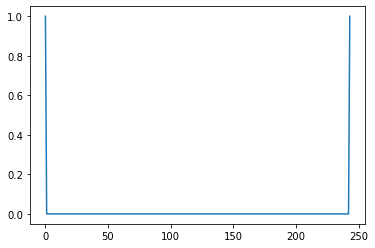

In [467]:
tips.T.isna().sum().plot()

## 통계 요약

In [468]:
tips.describe()

,total_bill,tip,size,bill,good,bad,total_bill(pre),total_bill(next)
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,243.000000,243.000000
mean,19.785943,2.998279,2.569672,16.787664,0.073770,0.926230,19.790082,19.797449
std,8.902412,1.383638,0.951100,8.032459,0.261934,0.261934,8.920551,8.918968
min,3.070000,1.000000,1.000000,2.070000,0.000000,0.000000,3.070000,3.070000
25%,13.347500,2.000000,2.000000,11.000000,0.000000,1.000000,13.325000,13.325000
50%,17.795000,2.900000,2.000000,14.555000,0.000000,1.000000,17.780000,17.810000
75%,24.127500,3.562500,3.000000,20.685000,0.000000,1.000000,24.175000,24.175000
max,50.810000,10.000000,6.000000,43.170000,1.000000,1.000000,50.810000,50.810000


- 요 녀석을 아래 이미지와 대조해서 보자.

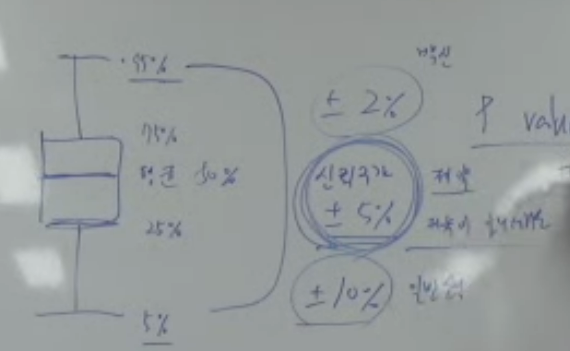

- P.value < 0.05 : 통계적 유의미 ( 신뢰구간 )

# "" 와 ''의 차이
- 큰 차이는 없지만 큰거 안에 작은거 써줘야됨 "' '" < 요런느낌

In [469]:
a = tips[tips['total_bill']>20]

In [470]:
a 

,total_bill,tip,sex,smoker,day,time,size,bill,level,good,bad,customer,total_bill(pre),total_bill(next),index_id
2,21.01,3.50,Male,No,Sun,Dinner,3,17.51,bad,0.0,1.0,non-vip,10.34,23.68,4
3,23.68,3.31,Male,No,Sun,Dinner,2,20.37,bad,0.0,1.0,non-vip,21.01,24.59,6
4,24.59,3.61,Female,No,Sun,Dinner,4,20.98,bad,0.0,1.0,vip,23.68,25.29,8
5,25.29,4.71,Male,No,Sun,Dinner,4,20.58,bad,0.0,1.0,vip,24.59,8.77,10
7,26.88,3.12,Male,No,Sun,Dinner,4,23.76,bad,0.0,1.0,non-vip,8.77,15.04,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,32.83,1.17,Male,Yes,Sat,Dinner,2,31.66,bad,0.0,1.0,non-vip,12.60,35.83,474
238,35.83,4.67,Female,No,Sat,Dinner,3,31.16,bad,0.0,1.0,vip,32.83,29.03,476
239,29.03,5.92,Male,No,Sat,Dinner,3,23.11,good,1.0,0.0,vip,35.83,27.18,478
240,27.18,2.00,Female,Yes,Sat,Dinner,2,25.18,bad,0.0,1.0,non-vip,29.03,22.67,480


In [471]:
tips[tips['sex']=='Male']

,total_bill,tip,sex,smoker,day,time,size,bill,level,good,bad,customer,total_bill(pre),total_bill(next),index_id
1,10.34,1.66,Male,No,Sun,Dinner,3,8.68,bad,0.0,1.0,non-vip,16.99,21.01,2
2,21.01,3.50,Male,No,Sun,Dinner,3,17.51,bad,0.0,1.0,non-vip,10.34,23.68,4
3,23.68,3.31,Male,No,Sun,Dinner,2,20.37,bad,0.0,1.0,non-vip,21.01,24.59,6
5,25.29,4.71,Male,No,Sun,Dinner,4,20.58,bad,0.0,1.0,vip,24.59,8.77,10
6,8.77,2.00,Male,No,Sun,Dinner,2,6.77,bad,0.0,1.0,non-vip,25.29,26.88,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,12.60,1.00,Male,Yes,Sat,Dinner,2,11.60,bad,0.0,1.0,non-vip,10.07,32.83,472
237,32.83,1.17,Male,Yes,Sat,Dinner,2,31.66,bad,0.0,1.0,non-vip,12.60,35.83,474
239,29.03,5.92,Male,No,Sat,Dinner,3,23.11,good,1.0,0.0,vip,35.83,27.18,478
241,22.67,2.00,Male,Yes,Sat,Dinner,2,20.67,bad,0.0,1.0,non-vip,27.18,17.82,482


- == 과 isin 은 같다

In [472]:
tips[tips['sex'].isin(['Female'])]

,total_bill,tip,sex,smoker,day,time,size,bill,level,good,bad,customer,total_bill(pre),total_bill(next),index_id
0,16.99,1.01,Female,No,Sun,Dinner,2,15.98,bad,0.0,1.0,non-vip,NaN,10.34,0
4,24.59,3.61,Female,No,Sun,Dinner,4,20.98,bad,0.0,1.0,vip,23.68,25.29,8
11,35.26,5.00,Female,No,Sun,Dinner,4,30.26,bad,0.0,1.0,vip,10.27,15.42,22
14,14.83,3.02,Female,No,Sun,Dinner,2,11.81,bad,0.0,1.0,non-vip,18.43,21.58,28
16,10.33,1.67,Female,No,Sun,Dinner,3,8.66,bad,0.0,1.0,non-vip,21.58,16.29,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,10.09,2.00,Female,Yes,Fri,Lunch,2,8.09,bad,0.0,1.0,non-vip,16.27,20.45,452
229,22.12,2.88,Female,Yes,Sat,Dinner,2,19.24,bad,0.0,1.0,non-vip,13.28,24.01,458
238,35.83,4.67,Female,No,Sat,Dinner,3,31.16,bad,0.0,1.0,vip,32.83,29.03,476
240,27.18,2.00,Female,Yes,Sat,Dinner,2,25.18,bad,0.0,1.0,non-vip,29.03,22.67,480


### 해당 글자가 포함된 value 를 찾는 기능

In [473]:
tips[tips['sex'].str.contains('F')]

,total_bill,tip,sex,smoker,day,time,size,bill,level,good,bad,customer,total_bill(pre),total_bill(next),index_id
0,16.99,1.01,Female,No,Sun,Dinner,2,15.98,bad,0.0,1.0,non-vip,NaN,10.34,0
4,24.59,3.61,Female,No,Sun,Dinner,4,20.98,bad,0.0,1.0,vip,23.68,25.29,8
11,35.26,5.00,Female,No,Sun,Dinner,4,30.26,bad,0.0,1.0,vip,10.27,15.42,22
14,14.83,3.02,Female,No,Sun,Dinner,2,11.81,bad,0.0,1.0,non-vip,18.43,21.58,28
16,10.33,1.67,Female,No,Sun,Dinner,3,8.66,bad,0.0,1.0,non-vip,21.58,16.29,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,10.09,2.00,Female,Yes,Fri,Lunch,2,8.09,bad,0.0,1.0,non-vip,16.27,20.45,452
229,22.12,2.88,Female,Yes,Sat,Dinner,2,19.24,bad,0.0,1.0,non-vip,13.28,24.01,458
238,35.83,4.67,Female,No,Sat,Dinner,3,31.16,bad,0.0,1.0,vip,32.83,29.03,476
240,27.18,2.00,Female,Yes,Sat,Dinner,2,25.18,bad,0.0,1.0,non-vip,29.03,22.67,480


In [474]:
tips.columns[-7]

'level'

In [475]:
print(len(tips.columns))
columns = tips.columns[[-1,0,1,2]]

15


In [476]:
tips[columns]

,index_id,total_bill,tip,sex
0,0,16.99,1.01,Female
1,2,10.34,1.66,Male
2,4,21.01,3.50,Male
3,6,23.68,3.31,Male
4,8,24.59,3.61,Female
...,...,...,...,...
239,478,29.03,5.92,Male
240,480,27.18,2.00,Female
241,482,22.67,2.00,Male
242,484,17.82,1.75,Male


In [477]:
tips1 = tips[['total_bill','time','tip']].copy()

In [478]:
tips1

,total_bill,time,tip
0,16.99,Dinner,1.01
1,10.34,Dinner,1.66
2,21.01,Dinner,3.50
3,23.68,Dinner,3.31
4,24.59,Dinner,3.61
...,...,...,...
239,29.03,Dinner,5.92
240,27.18,Dinner,2.00
241,22.67,Dinner,2.00
242,17.82,Dinner,1.75


## 카테고리를 보는 법
- unique()
- 카테고리가 지정되 있는 칼럼은 다른 값을 넣으면 에러가 난다.

In [479]:
tips['time'].unique()

['Dinner', 'Lunch']
Categories (2, object): ['Dinner', 'Lunch']

In [480]:
tips['sex'].unique()

['Female', 'Male']
Categories (2, object): ['Female', 'Male']

In [481]:
tips['total_bill'].describe()

count    244.000000
mean      19.785943
std        8.902412
min        3.070000
25%       13.347500
50%       17.795000
75%       24.127500
max       50.810000
Name: total_bill, dtype: float64

- 데이터 분류하는 건 Unique() 를 
- 데이터 값이 들어가 있는건 describe()를 자주 사용한다.

## Pandas를 활용한 데이터 전처리
- 데이터를 검색한 후 바꾸는 작업

In [482]:
tips1.loc[0,'time']='Lunch'

In [483]:
tips1

,total_bill,time,tip
0,16.99,Lunch,1.01
1,10.34,Dinner,1.66
2,21.01,Dinner,3.50
3,23.68,Dinner,3.31
4,24.59,Dinner,3.61
...,...,...,...
239,29.03,Dinner,5.92
240,27.18,Dinner,2.00
241,22.67,Dinner,2.00
242,17.82,Dinner,1.75


In [484]:
tips.head(2)

,total_bill,tip,sex,smoker,day,time,size,bill,level,good,bad,customer,total_bill(pre),total_bill(next),index_id
0,16.99,1.01,Female,No,Sun,Dinner,2,15.98,bad,0.0,1.0,non-vip,NaN,10.34,0
1,10.34,1.66,Male,No,Sun,Dinner,3,8.68,bad,0.0,1.0,non-vip,16.99,21.01,2


### 새로운 칼럼을 만드는 법
- 조건을 넣어서 새로운 칼럼 생성
- 기존의 없던 칼럼을 넣으면 생성된다.

In [485]:
tips.loc[tips['tip']>5, 'level'] = 'good'
tips.loc[tips['tip']<=5, 'level'] = 'bad'
tips

,total_bill,tip,sex,smoker,day,time,size,bill,level,good,bad,customer,total_bill(pre),total_bill(next),index_id
0,16.99,1.01,Female,No,Sun,Dinner,2,15.98,bad,0.0,1.0,non-vip,NaN,10.34,0
1,10.34,1.66,Male,No,Sun,Dinner,3,8.68,bad,0.0,1.0,non-vip,16.99,21.01,2
2,21.01,3.50,Male,No,Sun,Dinner,3,17.51,bad,0.0,1.0,non-vip,10.34,23.68,4
3,23.68,3.31,Male,No,Sun,Dinner,2,20.37,bad,0.0,1.0,non-vip,21.01,24.59,6
4,24.59,3.61,Female,No,Sun,Dinner,4,20.98,bad,0.0,1.0,vip,23.68,25.29,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,23.11,good,1.0,0.0,vip,35.83,27.18,478
240,27.18,2.00,Female,Yes,Sat,Dinner,2,25.18,bad,0.0,1.0,non-vip,29.03,22.67,480
241,22.67,2.00,Male,Yes,Sat,Dinner,2,20.67,bad,0.0,1.0,non-vip,27.18,17.82,482
242,17.82,1.75,Male,No,Sat,Dinner,2,16.07,bad,0.0,1.0,non-vip,22.67,18.78,484


### loc 으로 검색하는 방법
- 행 구분만 해주면 된다.

In [486]:
print(tips.loc[tips['level']=='good'].shape)
tips.loc[tips['level']=='good']

(18, 15)


,total_bill,tip,sex,smoker,day,time,size,bill,level,good,bad,customer,total_bill(pre),total_bill(next),index_id
23,39.42,7.58,Male,No,Sat,Dinner,4,31.84,good,1.0,0.0,vip,15.77,19.82,46
44,30.40,5.60,Male,No,Sun,Dinner,4,24.80,good,1.0,0.0,vip,9.68,18.29,88
47,32.40,6.00,Male,No,Sun,Dinner,4,26.40,good,1.0,0.0,vip,22.23,28.55,94
52,34.81,5.20,Female,No,Sun,Dinner,4,29.61,good,1.0,0.0,vip,10.29,9.94,104
59,48.27,6.73,Male,No,Sat,Dinner,4,41.54,good,1.0,0.0,vip,11.24,20.29,118
85,34.83,5.17,Female,No,Thur,Lunch,4,29.66,good,1.0,0.0,vip,15.98,13.03,170
88,24.71,5.85,Male,No,Thur,Lunch,2,18.86,good,1.0,0.0,vip,18.28,21.16,176
116,29.93,5.07,Male,No,Sun,Dinner,4,24.86,good,1.0,0.0,vip,17.31,10.65,232
141,34.30,6.70,Male,No,Thur,Lunch,6,27.60,good,1.0,0.0,vip,17.47,41.19,282
155,29.85,5.14,Female,No,Sun,Dinner,5,24.71,good,1.0,0.0,vip,19.77,48.17,310


In [487]:
# rows에 tips를 넣고, tips의 총 행의 갯수를 본다.
rows = tips.shape[0]

# 0부터 243 까지 순환문을 돌린다.
for i in range(rows):
    # i를 행조건으로 넣는다.
    # 기존 index의 숫자보다 2배로 출력한다.
    tips.loc[i, 'index_id'] = str(2 * i)
    
tips

,total_bill,tip,sex,smoker,day,time,size,bill,level,good,bad,customer,total_bill(pre),total_bill(next),index_id
0,16.99,1.01,Female,No,Sun,Dinner,2,15.98,bad,0.0,1.0,non-vip,NaN,10.34,0
1,10.34,1.66,Male,No,Sun,Dinner,3,8.68,bad,0.0,1.0,non-vip,16.99,21.01,2
2,21.01,3.50,Male,No,Sun,Dinner,3,17.51,bad,0.0,1.0,non-vip,10.34,23.68,4
3,23.68,3.31,Male,No,Sun,Dinner,2,20.37,bad,0.0,1.0,non-vip,21.01,24.59,6
4,24.59,3.61,Female,No,Sun,Dinner,4,20.98,bad,0.0,1.0,vip,23.68,25.29,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,23.11,good,1.0,0.0,vip,35.83,27.18,478
240,27.18,2.00,Female,Yes,Sat,Dinner,2,25.18,bad,0.0,1.0,non-vip,29.03,22.67,480
241,22.67,2.00,Male,Yes,Sat,Dinner,2,20.67,bad,0.0,1.0,non-vip,27.18,17.82,482
242,17.82,1.75,Male,No,Sat,Dinner,2,16.07,bad,0.0,1.0,non-vip,22.67,18.78,484


### index 셋팅하기

In [488]:
tips_m = tips.set_index('index_id')

#### index가 되는 칼럼은 보는거처럼 두번째 칸으로 지정된다.

In [489]:
tips_m

,total_bill,tip,sex,smoker,day,time,size,bill,level,good,bad,customer,total_bill(pre),total_bill(next)
index_id,,,,,,,,,,,,,,
0,16.99,1.01,Female,No,Sun,Dinner,2,15.98,bad,0.0,1.0,non-vip,NaN,10.34
2,10.34,1.66,Male,No,Sun,Dinner,3,8.68,bad,0.0,1.0,non-vip,16.99,21.01
4,21.01,3.50,Male,No,Sun,Dinner,3,17.51,bad,0.0,1.0,non-vip,10.34,23.68
6,23.68,3.31,Male,No,Sun,Dinner,2,20.37,bad,0.0,1.0,non-vip,21.01,24.59
8,24.59,3.61,Female,No,Sun,Dinner,4,20.98,bad,0.0,1.0,vip,23.68,25.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478,29.03,5.92,Male,No,Sat,Dinner,3,23.11,good,1.0,0.0,vip,35.83,27.18
480,27.18,2.00,Female,Yes,Sat,Dinner,2,25.18,bad,0.0,1.0,non-vip,29.03,22.67
482,22.67,2.00,Male,Yes,Sat,Dinner,2,20.67,bad,0.0,1.0,non-vip,27.18,17.82


In [490]:
tips.head(2)

,total_bill,tip,sex,smoker,day,time,size,bill,level,good,bad,customer,total_bill(pre),total_bill(next),index_id
0,16.99,1.01,Female,No,Sun,Dinner,2,15.98,bad,0.0,1.0,non-vip,NaN,10.34,0
1,10.34,1.66,Male,No,Sun,Dinner,3,8.68,bad,0.0,1.0,non-vip,16.99,21.01,2


In [491]:
# 칼럼에 있던 value들이 모두 index화 된다.
tips_m.head(2)

,total_bill,tip,sex,smoker,day,time,size,bill,level,good,bad,customer,total_bill(pre),total_bill(next)
index_id,,,,,,,,,,,,,,
0,16.99,1.01,Female,No,Sun,Dinner,2,15.98,bad,0.0,1.0,non-vip,NaN,10.34
2,10.34,1.66,Male,No,Sun,Dinner,3,8.68,bad,0.0,1.0,non-vip,16.99,21.01


### loc 과 iloc 의 차이
- 마지막 값이 포함되고 안되는 차이.
- 인덱스를 구별하는 기준도 바뀐다.

- 행 숫자로 인식한다. 

In [492]:
tips_m.iloc[1:101]

,total_bill,tip,sex,smoker,day,time,size,bill,level,good,bad,customer,total_bill(pre),total_bill(next)
index_id,,,,,,,,,,,,,,
2,10.34,1.66,Male,No,Sun,Dinner,3,8.68,bad,0.0,1.0,non-vip,16.99,21.01
4,21.01,3.50,Male,No,Sun,Dinner,3,17.51,bad,0.0,1.0,non-vip,10.34,23.68
6,23.68,3.31,Male,No,Sun,Dinner,2,20.37,bad,0.0,1.0,non-vip,21.01,24.59
8,24.59,3.61,Female,No,Sun,Dinner,4,20.98,bad,0.0,1.0,vip,23.68,25.29
10,25.29,4.71,Male,No,Sun,Dinner,4,20.58,bad,0.0,1.0,vip,24.59,8.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,27.28,4.00,Male,Yes,Fri,Dinner,2,23.28,bad,0.0,1.0,vip,40.17,12.03
194,12.03,1.50,Male,Yes,Fri,Dinner,2,10.53,bad,0.0,1.0,non-vip,27.28,21.01
196,21.01,3.00,Male,Yes,Fri,Dinner,2,18.01,bad,0.0,1.0,non-vip,12.03,12.46


- 인덱스의 값으로 인식한다. ( 인덱스가 0,2,4,6,8 이어도 0,1,2,3,4 로 본다 ) 
- 인덱스의 영향을 받고, 마지막 값을 포함 시킨다.

In [493]:
tips_m.loc["2":"200"]

,total_bill,tip,sex,smoker,day,time,size,bill,level,good,bad,customer,total_bill(pre),total_bill(next)
index_id,,,,,,,,,,,,,,
2,10.34,1.66,Male,No,Sun,Dinner,3,8.68,bad,0.0,1.0,non-vip,16.99,21.01
4,21.01,3.50,Male,No,Sun,Dinner,3,17.51,bad,0.0,1.0,non-vip,10.34,23.68
6,23.68,3.31,Male,No,Sun,Dinner,2,20.37,bad,0.0,1.0,non-vip,21.01,24.59
8,24.59,3.61,Female,No,Sun,Dinner,4,20.98,bad,0.0,1.0,vip,23.68,25.29
10,25.29,4.71,Male,No,Sun,Dinner,4,20.58,bad,0.0,1.0,vip,24.59,8.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,27.28,4.00,Male,Yes,Fri,Dinner,2,23.28,bad,0.0,1.0,vip,40.17,12.03
194,12.03,1.50,Male,Yes,Fri,Dinner,2,10.53,bad,0.0,1.0,non-vip,27.28,21.01
196,21.01,3.00,Male,Yes,Fri,Dinner,2,18.01,bad,0.0,1.0,non-vip,12.03,12.46


In [494]:
tips_m.iloc[:2]

,total_bill,tip,sex,smoker,day,time,size,bill,level,good,bad,customer,total_bill(pre),total_bill(next)
index_id,,,,,,,,,,,,,,
0,16.99,1.01,Female,No,Sun,Dinner,2,15.98,bad,0.0,1.0,non-vip,NaN,10.34
2,10.34,1.66,Male,No,Sun,Dinner,3,8.68,bad,0.0,1.0,non-vip,16.99,21.01


In [495]:
tips_m.loc[:"2"]

,total_bill,tip,sex,smoker,day,time,size,bill,level,good,bad,customer,total_bill(pre),total_bill(next)
index_id,,,,,,,,,,,,,,
0,16.99,1.01,Female,No,Sun,Dinner,2,15.98,bad,0.0,1.0,non-vip,NaN,10.34
2,10.34,1.66,Male,No,Sun,Dinner,3,8.68,bad,0.0,1.0,non-vip,16.99,21.01


### 사칙연산을 써서 칼럼들의 값을 계산할 수 있따.

In [496]:
tips['ratio'] = tips['tip'] / tips['total_bill']

In [497]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,bill,level,good,bad,customer,total_bill(pre),total_bill(next),index_id,ratio
0,16.99,1.01,Female,No,Sun,Dinner,2,15.98,bad,0.0,1.0,non-vip,NaN,10.34,0,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,8.68,bad,0.0,1.0,non-vip,16.99,21.01,2,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,17.51,bad,0.0,1.0,non-vip,10.34,23.68,4,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,20.37,bad,0.0,1.0,non-vip,21.01,24.59,6,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,20.98,bad,0.0,1.0,vip,23.68,25.29,8,0.146808


## list로 dataframe 만들기
- list의 data들은 받아오거나 함수, 기능으로 계산되서 나오는 데이터를 붙혀넣는다

In [498]:
date = ["2021-08-01","2021-08-05","2021-08-10"]
price = [500,700,200]
state = ["confirmed", "confirmed", "canceled"]
print(len(date))
print(len(price))
print(len(state))

order = {
    "date":date, 
    "price":price, 
    "state":state
}

order = pd.DataFrame(order)

3
3
3


In [499]:
order

,date,price,state
0,2021-08-01,500,confirmed
1,2021-08-05,700,confirmed
2,2021-08-10,200,canceled


## 빈값 만들기
-  Not a Number

In [500]:
np.nan

nan

## Pandas 활용 데이터 검색

In [501]:
tips = sns.load_dataset("tips")

In [568]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


- 리스트와 리스트를 묶으면 시리즈가 된다.
- 시리즈를 다발로 묶으면 데이터프레임이 된다.

In [569]:
# x의 변수는 columns이 된다.
def bill(x) :
    total_bill = x['total_bill']
    # tip 에는 'tip' 칼럼의 list 가 저장된다.
    tip = x['tip']
    
    # 그래서 결국 total_bill 에서 tip 칼럼을 뺀 값을 return 한다.
    bill = total_bill - tip
    return bill

# 열이 rows / 행이 columns
tips['bill'] = tips.apply(bill, axis='columns')

tips

,total_bill,tip,sex,smoker,day,time,size,bill
0,16.99,1.01,Female,No,Sun,Dinner,2,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,20.98
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,23.11
240,27.18,2.00,Female,Yes,Sat,Dinner,2,25.18
241,22.67,2.00,Male,Yes,Sat,Dinner,2,20.67
242,17.82,1.75,Male,No,Sat,Dinner,2,16.07


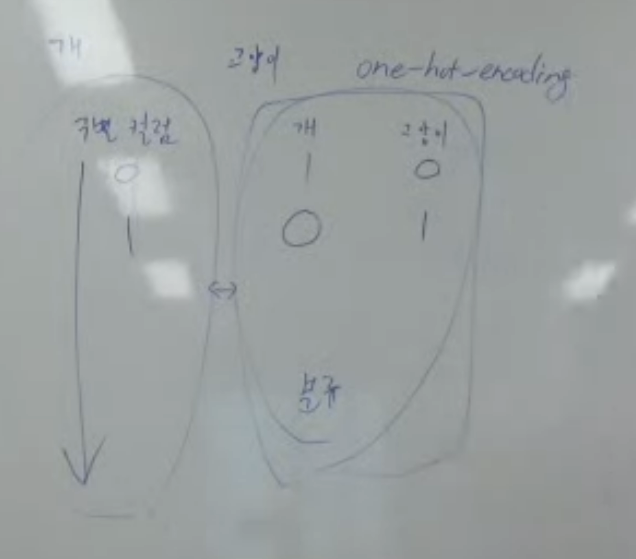

## one-hot encoding
- 기계가 알아보기 쉽도록 만든다.
- 요 인코딩으로 만드려면 칼럼의 값들을 0 아니면 1 혹은 3,4,5 등등.. 숫자로 바꿔줘야 함.

In [570]:
tips.loc[tips['tip']>5, 'level'] = 'good'
tips.loc[tips['tip']<=5, 'level'] = 'bad'
tips

,total_bill,tip,sex,smoker,day,time,size,bill,level
0,16.99,1.01,Female,No,Sun,Dinner,2,15.98,bad
1,10.34,1.66,Male,No,Sun,Dinner,3,8.68,bad
2,21.01,3.50,Male,No,Sun,Dinner,3,17.51,bad
3,23.68,3.31,Male,No,Sun,Dinner,2,20.37,bad
4,24.59,3.61,Female,No,Sun,Dinner,4,20.98,bad
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,23.11,good
240,27.18,2.00,Female,Yes,Sat,Dinner,2,25.18,bad
241,22.67,2.00,Male,Yes,Sat,Dinner,2,20.67,bad
242,17.82,1.75,Male,No,Sat,Dinner,2,16.07,bad


In [571]:
# 원래는 모든 값을 0으로 셋팅하고 조건에 맞는 값을 1을 넣어주는게 정석이다.
# tips['good'] = 0
# tips['bad'] = 0

# good이 맞는 경우 good columns 를 새로 만들고, 거기다가 1을 넣어라. 라는 코드
tips.loc[tips['level']=='good','good'] = 1
tips.loc[tips['level']=='bad','bad'] = 1

In [572]:
tips

,total_bill,tip,sex,smoker,day,time,size,bill,level,good,bad
0,16.99,1.01,Female,No,Sun,Dinner,2,15.98,bad,NaN,1.0
1,10.34,1.66,Male,No,Sun,Dinner,3,8.68,bad,NaN,1.0
2,21.01,3.50,Male,No,Sun,Dinner,3,17.51,bad,NaN,1.0
3,23.68,3.31,Male,No,Sun,Dinner,2,20.37,bad,NaN,1.0
4,24.59,3.61,Female,No,Sun,Dinner,4,20.98,bad,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,23.11,good,1.0,NaN
240,27.18,2.00,Female,Yes,Sat,Dinner,2,25.18,bad,NaN,1.0
241,22.67,2.00,Male,Yes,Sat,Dinner,2,20.67,bad,NaN,1.0
242,17.82,1.75,Male,No,Sat,Dinner,2,16.07,bad,NaN,1.0


<AxesSubplot:>

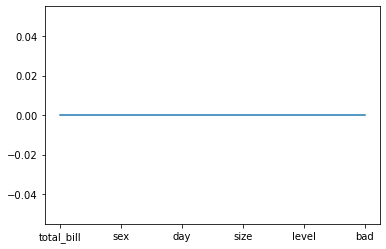

In [573]:
# 얘랑 위에 0넣는거랑 차이점 ??
# 얘는 빈값에 채워넣는거고, 위에 코드는 그냥 싸그리 싹다 0으로 바꾸는 것
# 조심해서 쓰자...

tips['good'] = tips['good'].fillna(0)
tips['bad'] = tips['bad'].fillna(0)
tips.isnull().sum().plot()

In [574]:
tips.describe()

,total_bill,tip,size,bill,good,bad
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672,16.787664,0.073770,0.926230
std,8.902412,1.383638,0.951100,8.032459,0.261934,0.261934
min,3.070000,1.000000,1.000000,2.070000,0.000000,0.000000
25%,13.347500,2.000000,2.000000,11.000000,0.000000,1.000000
50%,17.795000,2.900000,2.000000,14.555000,0.000000,1.000000
75%,24.127500,3.562500,3.000000,20.685000,0.000000,1.000000
max,50.810000,10.000000,6.000000,43.170000,1.000000,1.000000


In [575]:
tips

,total_bill,tip,sex,smoker,day,time,size,bill,level,good,bad
0,16.99,1.01,Female,No,Sun,Dinner,2,15.98,bad,0.0,1.0
1,10.34,1.66,Male,No,Sun,Dinner,3,8.68,bad,0.0,1.0
2,21.01,3.50,Male,No,Sun,Dinner,3,17.51,bad,0.0,1.0
3,23.68,3.31,Male,No,Sun,Dinner,2,20.37,bad,0.0,1.0
4,24.59,3.61,Female,No,Sun,Dinner,4,20.98,bad,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,23.11,good,1.0,0.0
240,27.18,2.00,Female,Yes,Sat,Dinner,2,25.18,bad,0.0,1.0
241,22.67,2.00,Male,Yes,Sat,Dinner,2,20.67,bad,0.0,1.0
242,17.82,1.75,Male,No,Sat,Dinner,2,16.07,bad,0.0,1.0


- and, or 는 if 문에서 사용
- &, | 는 조건문 생성시 사용

In [576]:
# 조건문 A와 B를 넣는다.
tips.loc[(tips['total_bill']>24)&(tips['tip']>3.5),'customer'] = 'vip' 
tips.loc[(tips['total_bill']<=24)|(tips['tip']<=3.5),'customer'] = 'non-vip' 

In [577]:
tips

,total_bill,tip,sex,smoker,day,time,size,bill,level,good,bad,customer
0,16.99,1.01,Female,No,Sun,Dinner,2,15.98,bad,0.0,1.0,non-vip
1,10.34,1.66,Male,No,Sun,Dinner,3,8.68,bad,0.0,1.0,non-vip
2,21.01,3.50,Male,No,Sun,Dinner,3,17.51,bad,0.0,1.0,non-vip
3,23.68,3.31,Male,No,Sun,Dinner,2,20.37,bad,0.0,1.0,non-vip
4,24.59,3.61,Female,No,Sun,Dinner,4,20.98,bad,0.0,1.0,vip
...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,23.11,good,1.0,0.0,vip
240,27.18,2.00,Female,Yes,Sat,Dinner,2,25.18,bad,0.0,1.0,non-vip
241,22.67,2.00,Male,Yes,Sat,Dinner,2,20.67,bad,0.0,1.0,non-vip
242,17.82,1.75,Male,No,Sat,Dinner,2,16.07,bad,0.0,1.0,non-vip


### 앞,  뒷사람과의 데이터 비교
- shift , pre , next 를 사용한다.

In [578]:
# 앞으로 당기는것 : pre / shift(+1) 은 한칸 당기겠다.
tips['total_bill(pre)'] = tips['total_bill'].shift(+1)

# 뒤로 미는 것 : next / shift(-1) 은 한칸 밀겠다.
tips['total_bill(next)'] = tips['total_bill'].shift(-1)

In [579]:
tips[['total_bill','total_bill(pre)','total_bill(next)']]

,total_bill,total_bill(pre),total_bill(next)
0,16.99,NaN,10.34
1,10.34,16.99,21.01
2,21.01,10.34,23.68
3,23.68,21.01,24.59
4,24.59,23.68,25.29
...,...,...,...
239,29.03,35.83,27.18
240,27.18,29.03,22.67
241,22.67,27.18,17.82
242,17.82,22.67,18.78


- 보통은 시간간격을 나타내기 위해서 사용한다.
- 한사람의 접속시간을 통계하기 위해서 ( ex. 일랜시아 접속시 뜨는거 ㅋㅋ )

## Columns 지우기
- drop 문 사용해서 특정 칼럼을 삭제한다.

In [580]:
tips

,total_bill,tip,sex,smoker,day,time,size,bill,level,good,bad,customer,total_bill(pre),total_bill(next)
0,16.99,1.01,Female,No,Sun,Dinner,2,15.98,bad,0.0,1.0,non-vip,NaN,10.34
1,10.34,1.66,Male,No,Sun,Dinner,3,8.68,bad,0.0,1.0,non-vip,16.99,21.01
2,21.01,3.50,Male,No,Sun,Dinner,3,17.51,bad,0.0,1.0,non-vip,10.34,23.68
3,23.68,3.31,Male,No,Sun,Dinner,2,20.37,bad,0.0,1.0,non-vip,21.01,24.59
4,24.59,3.61,Female,No,Sun,Dinner,4,20.98,bad,0.0,1.0,vip,23.68,25.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,23.11,good,1.0,0.0,vip,35.83,27.18
240,27.18,2.00,Female,Yes,Sat,Dinner,2,25.18,bad,0.0,1.0,non-vip,29.03,22.67
241,22.67,2.00,Male,Yes,Sat,Dinner,2,20.67,bad,0.0,1.0,non-vip,27.18,17.82
242,17.82,1.75,Male,No,Sat,Dinner,2,16.07,bad,0.0,1.0,non-vip,22.67,18.78


#### drop 은 default 가 행으로 되어있다.

In [581]:
tips_simple = tips.drop(["total_bill(pre)", "total_bill(next)"],axis=1)

In [582]:
tips_simple

,total_bill,tip,sex,smoker,day,time,size,bill,level,good,bad,customer
0,16.99,1.01,Female,No,Sun,Dinner,2,15.98,bad,0.0,1.0,non-vip
1,10.34,1.66,Male,No,Sun,Dinner,3,8.68,bad,0.0,1.0,non-vip
2,21.01,3.50,Male,No,Sun,Dinner,3,17.51,bad,0.0,1.0,non-vip
3,23.68,3.31,Male,No,Sun,Dinner,2,20.37,bad,0.0,1.0,non-vip
4,24.59,3.61,Female,No,Sun,Dinner,4,20.98,bad,0.0,1.0,vip
...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,23.11,good,1.0,0.0,vip
240,27.18,2.00,Female,Yes,Sat,Dinner,2,25.18,bad,0.0,1.0,non-vip
241,22.67,2.00,Male,Yes,Sat,Dinner,2,20.67,bad,0.0,1.0,non-vip
242,17.82,1.75,Male,No,Sat,Dinner,2,16.07,bad,0.0,1.0,non-vip


# Pandas의 전처리
- 원본 데이터는 유지하면서 사본을 복사해서 전처리한다.

In [583]:
tips

,total_bill,tip,sex,smoker,day,time,size,bill,level,good,bad,customer,total_bill(pre),total_bill(next)
0,16.99,1.01,Female,No,Sun,Dinner,2,15.98,bad,0.0,1.0,non-vip,NaN,10.34
1,10.34,1.66,Male,No,Sun,Dinner,3,8.68,bad,0.0,1.0,non-vip,16.99,21.01
2,21.01,3.50,Male,No,Sun,Dinner,3,17.51,bad,0.0,1.0,non-vip,10.34,23.68
3,23.68,3.31,Male,No,Sun,Dinner,2,20.37,bad,0.0,1.0,non-vip,21.01,24.59
4,24.59,3.61,Female,No,Sun,Dinner,4,20.98,bad,0.0,1.0,vip,23.68,25.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,23.11,good,1.0,0.0,vip,35.83,27.18
240,27.18,2.00,Female,Yes,Sat,Dinner,2,25.18,bad,0.0,1.0,non-vip,29.03,22.67
241,22.67,2.00,Male,Yes,Sat,Dinner,2,20.67,bad,0.0,1.0,non-vip,27.18,17.82
242,17.82,1.75,Male,No,Sat,Dinner,2,16.07,bad,0.0,1.0,non-vip,22.67,18.78


## 데이터 정렬
- 복잡한 데이터를 순차적으로 보기위해 ( 가독성 )

In [584]:
tips.sort_index(ascending=True)

,total_bill,tip,sex,smoker,day,time,size,bill,level,good,bad,customer,total_bill(pre),total_bill(next)
0,16.99,1.01,Female,No,Sun,Dinner,2,15.98,bad,0.0,1.0,non-vip,NaN,10.34
1,10.34,1.66,Male,No,Sun,Dinner,3,8.68,bad,0.0,1.0,non-vip,16.99,21.01
2,21.01,3.50,Male,No,Sun,Dinner,3,17.51,bad,0.0,1.0,non-vip,10.34,23.68
3,23.68,3.31,Male,No,Sun,Dinner,2,20.37,bad,0.0,1.0,non-vip,21.01,24.59
4,24.59,3.61,Female,No,Sun,Dinner,4,20.98,bad,0.0,1.0,vip,23.68,25.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,23.11,good,1.0,0.0,vip,35.83,27.18
240,27.18,2.00,Female,Yes,Sat,Dinner,2,25.18,bad,0.0,1.0,non-vip,29.03,22.67
241,22.67,2.00,Male,Yes,Sat,Dinner,2,20.67,bad,0.0,1.0,non-vip,27.18,17.82
242,17.82,1.75,Male,No,Sat,Dinner,2,16.07,bad,0.0,1.0,non-vip,22.67,18.78


- axis=0 은 행단위로 전처리
- axis=1 은 열단위로 전처리

In [585]:
# 칼럼을 알파벳 순으로 정렬
tips.sort_index(axis=1)

,bad,bill,customer,day,good,level,sex,size,smoker,time,tip,total_bill,total_bill(next),total_bill(pre)
0,1.0,15.98,non-vip,Sun,0.0,bad,Female,2,No,Dinner,1.01,16.99,10.34,NaN
1,1.0,8.68,non-vip,Sun,0.0,bad,Male,3,No,Dinner,1.66,10.34,21.01,16.99
2,1.0,17.51,non-vip,Sun,0.0,bad,Male,3,No,Dinner,3.50,21.01,23.68,10.34
3,1.0,20.37,non-vip,Sun,0.0,bad,Male,2,No,Dinner,3.31,23.68,24.59,21.01
4,1.0,20.98,vip,Sun,0.0,bad,Female,4,No,Dinner,3.61,24.59,25.29,23.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,0.0,23.11,vip,Sat,1.0,good,Male,3,No,Dinner,5.92,29.03,27.18,35.83
240,1.0,25.18,non-vip,Sat,0.0,bad,Female,2,Yes,Dinner,2.00,27.18,22.67,29.03
241,1.0,20.67,non-vip,Sat,0.0,bad,Male,2,Yes,Dinner,2.00,22.67,17.82,27.18
242,1.0,16.07,non-vip,Sat,0.0,bad,Male,2,No,Dinner,1.75,17.82,18.78,22.67


In [586]:
print(tips.columns)
column = [0,1,3,5] 
tips[tips.columns[column]]

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size', 'bill',
       'level', 'good', 'bad', 'customer', 'total_bill(pre)',
       'total_bill(next)'],
      dtype='object')


,total_bill,tip,smoker,time
0,16.99,1.01,No,Dinner
1,10.34,1.66,No,Dinner
2,21.01,3.50,No,Dinner
3,23.68,3.31,No,Dinner
4,24.59,3.61,No,Dinner
...,...,...,...,...
239,29.03,5.92,No,Dinner
240,27.18,2.00,Yes,Dinner
241,22.67,2.00,Yes,Dinner
242,17.82,1.75,No,Dinner


In [587]:
# columns 을 기준으로 정렬. by는 전송문
# ascending 은 오름차순
tips.sort_values(by='total_bill', ascending=True)

,total_bill,tip,sex,smoker,day,time,size,bill,level,good,bad,customer,total_bill(pre),total_bill(next)
67,3.07,1.00,Female,Yes,Sat,Dinner,1,2.07,bad,0.0,1.0,non-vip,16.45,20.23
92,5.75,1.00,Female,Yes,Fri,Dinner,2,4.75,bad,0.0,1.0,non-vip,22.49,16.32
111,7.25,1.00,Female,No,Sat,Dinner,1,6.25,bad,0.0,1.0,non-vip,14.00,38.07
172,7.25,5.15,Male,Yes,Sun,Dinner,2,2.10,good,1.0,0.0,non-vip,15.81,31.85
149,7.51,2.00,Male,No,Thur,Lunch,2,5.51,bad,0.0,1.0,non-vip,9.78,14.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,45.35,3.50,Male,Yes,Sun,Dinner,3,41.85,bad,0.0,1.0,non-vip,23.33,23.17
156,48.17,5.00,Male,No,Sun,Dinner,6,43.17,bad,0.0,1.0,vip,29.85,25.00
59,48.27,6.73,Male,No,Sat,Dinner,4,41.54,good,1.0,0.0,vip,11.24,20.29
212,48.33,9.00,Male,No,Sat,Dinner,4,39.33,good,1.0,0.0,vip,25.89,13.27


In [588]:
# size 1 중에서 제일 큰 값을 불러오는 것
a = ['size',
     'tip']
tips.sort_values(by=a, ascending=[True,False])[a]

,size,tip
222,1,1.92
82,1,1.83
67,1,1.00
111,1,1.00
88,2,5.85
...,...,...
187,5,2.00
141,6,6.70
143,6,5.00
156,6,5.00


## 피벗테이블 (pivot table)과 Groupby
- 데이터의 결과를 보고 싶을 때 사용함

In [589]:
tips.describe()
# 요 친구도 피벗테이블, 그룹바이라고 볼 수 있따.

,total_bill,tip,size,bill,good,bad,total_bill(pre),total_bill(next)
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,243.000000,243.000000
mean,19.785943,2.998279,2.569672,16.787664,0.073770,0.926230,19.790082,19.797449
std,8.902412,1.383638,0.951100,8.032459,0.261934,0.261934,8.920551,8.918968
min,3.070000,1.000000,1.000000,2.070000,0.000000,0.000000,3.070000,3.070000
25%,13.347500,2.000000,2.000000,11.000000,0.000000,1.000000,13.325000,13.325000
50%,17.795000,2.900000,2.000000,14.555000,0.000000,1.000000,17.780000,17.810000
75%,24.127500,3.562500,3.000000,20.685000,0.000000,1.000000,24.175000,24.175000
max,50.810000,10.000000,6.000000,43.170000,1.000000,1.000000,50.810000,50.810000


In [590]:
pd.pivot_table(tips, index=['level', 'smoker'], values=['tip','bill'],aggfunc=['mean','sum','std'])

mean                sum                std          
                   bill       tip     bill     tip       bill       tip
level smoker                                                           
bad   Yes     17.596207  2.768391  1530.87  240.85   9.042828  1.001323
      No      15.131942  2.718058  2103.34  377.81   6.169036  1.000206
good  Yes     19.943333  6.493333   119.66   38.96  12.435754  1.821556
      No      28.526667  6.163333   342.32   73.96   6.533554  1.180195

### pivot테이블과 groupby의 차이점
- groupby는 데이터에 직접접근해서 사용한다.
- 대신 func은 하나만 사용 가능하다.
- 속도면에서는 훨씬 빠르다

In [603]:
# rows에 tips를 넣고, tips의 총 행의 갯수를 본다.
rows = tips.shape[0]

# 0부터 243 까지 순환문을 돌린다.
for i in range(rows):
    # i를 행조건으로 넣는다.
    # 기존 index의 숫자보다 2배로 출력한다.
    tips.loc[i, 'index_id'] = str(2 * i)
    
tips

,total_bill,tip,sex,smoker,day,time,size,bill,level,good,bad,customer,total_bill(pre),total_bill(next),index_id
0,16.99,1.01,Female,No,Sun,Dinner,2,15.98,bad,0.0,1.0,non-vip,NaN,10.34,0
1,10.34,1.66,Male,No,Sun,Dinner,3,8.68,bad,0.0,1.0,non-vip,16.99,21.01,2
2,21.01,3.50,Male,No,Sun,Dinner,3,17.51,bad,0.0,1.0,non-vip,10.34,23.68,4
3,23.68,3.31,Male,No,Sun,Dinner,2,20.37,bad,0.0,1.0,non-vip,21.01,24.59,6
4,24.59,3.61,Female,No,Sun,Dinner,4,20.98,bad,0.0,1.0,vip,23.68,25.29,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,23.11,good,1.0,0.0,vip,35.83,27.18,478
240,27.18,2.00,Female,Yes,Sat,Dinner,2,25.18,bad,0.0,1.0,non-vip,29.03,22.67,480
241,22.67,2.00,Male,Yes,Sat,Dinner,2,20.67,bad,0.0,1.0,non-vip,27.18,17.82,482
242,17.82,1.75,Male,No,Sat,Dinner,2,16.07,bad,0.0,1.0,non-vip,22.67,18.78,484


In [604]:
tips.groupby(['level','smoker'])['tip','bill'].sum()

tip     bill
level smoker                 
bad   Yes     240.85  1530.87
      No      377.81  2103.34
good  Yes      38.96   119.66
      No       73.96   342.32

## DataFrame 합치기

In [605]:
tips210801 = tips.loc[:120]
tips210801.head(2)

,total_bill,tip,sex,smoker,day,time,size,bill,level,good,bad,customer,total_bill(pre),total_bill(next),index_id
0,16.99,1.01,Female,No,Sun,Dinner,2,15.98,bad,0.0,1.0,non-vip,NaN,10.34,0
1,10.34,1.66,Male,No,Sun,Dinner,3,8.68,bad,0.0,1.0,non-vip,16.99,21.01,2


In [606]:
tips210802 = tips.loc[121:]
tips210802.tail(2)

,total_bill,tip,sex,smoker,day,time,size,bill,level,good,bad,customer,total_bill(pre),total_bill(next),index_id
242,17.82,1.75,Male,No,Sat,Dinner,2,16.07,bad,0.0,1.0,non-vip,22.67,18.78,484
243,18.78,3.00,Female,No,Thur,Dinner,2,15.78,bad,0.0,1.0,non-vip,17.82,NaN,486


In [607]:
# Default로 행기준으로 붙힌다.
tips_sum = pd.concat([tips210801, tips210802])

In [608]:
tips

,total_bill,tip,sex,smoker,day,time,size,bill,level,good,bad,customer,total_bill(pre),total_bill(next),index_id
0,16.99,1.01,Female,No,Sun,Dinner,2,15.98,bad,0.0,1.0,non-vip,NaN,10.34,0
1,10.34,1.66,Male,No,Sun,Dinner,3,8.68,bad,0.0,1.0,non-vip,16.99,21.01,2
2,21.01,3.50,Male,No,Sun,Dinner,3,17.51,bad,0.0,1.0,non-vip,10.34,23.68,4
3,23.68,3.31,Male,No,Sun,Dinner,2,20.37,bad,0.0,1.0,non-vip,21.01,24.59,6
4,24.59,3.61,Female,No,Sun,Dinner,4,20.98,bad,0.0,1.0,vip,23.68,25.29,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,23.11,good,1.0,0.0,vip,35.83,27.18,478
240,27.18,2.00,Female,Yes,Sat,Dinner,2,25.18,bad,0.0,1.0,non-vip,29.03,22.67,480
241,22.67,2.00,Male,Yes,Sat,Dinner,2,20.67,bad,0.0,1.0,non-vip,27.18,17.82,482
242,17.82,1.75,Male,No,Sat,Dinner,2,16.07,bad,0.0,1.0,non-vip,22.67,18.78,484


In [609]:
tips_pn = tips_sum[['total_bill(pre)','total_bill(next)']]
tips_pn

,total_bill(pre),total_bill(next)
0,NaN,10.34
1,16.99,21.01
2,10.34,23.68
3,21.01,24.59
4,23.68,25.29
...,...,...
239,35.83,27.18
240,29.03,22.67
241,27.18,17.82
242,22.67,18.78


In [610]:
tups_sum2 = pd.concat([tips_simple, tips_pn], axis=1)

In [611]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size', 'bill',
       'level', 'good', 'bad', 'customer', 'total_bill(pre)',
       'total_bill(next)', 'index_id'],
      dtype='object')

In [615]:
a = ['index_id' ,'total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size', 'bill', 'level']
b = ['index_id' ,'good', 'bad', 'customer', 'total_bill(pre)', 'total_bill(next)']
tips_a = tips[a]
tips_b = tips[b]
tips_b['Lv'] = tips['index_id']
tips_b = tips_b.drop(['index_id'], axis='columns')
tips_b.head()

,good,bad,customer,total_bill(pre),total_bill(next),Lv
0,0.0,1.0,non-vip,NaN,10.34,0
1,0.0,1.0,non-vip,16.99,21.01,2
2,0.0,1.0,non-vip,10.34,23.68,4
3,0.0,1.0,non-vip,21.01,24.59,6
4,0.0,1.0,vip,23.68,25.29,8


In [616]:
tips_a = tips_a.set_index('index_id')
tips_a.head()

,total_bill,tip,sex,smoker,day,time,size,bill,level
index_id,,,,,,,,,
0,16.99,1.01,Female,No,Sun,Dinner,2,15.98,bad
2,10.34,1.66,Male,No,Sun,Dinner,3,8.68,bad
4,21.01,3.50,Male,No,Sun,Dinner,3,17.51,bad
6,23.68,3.31,Male,No,Sun,Dinner,2,20.37,bad
8,24.59,3.61,Female,No,Sun,Dinner,4,20.98,bad


In [617]:
# index 이름이 같다면 on만 써도된다.
c = pd.merge(tips_a, tips_b, left_on = 'index_id', right_on='Lv', how='inner')

In [618]:
c

,total_bill,tip,sex,smoker,day,time,size,bill,level,good,bad,customer,total_bill(pre),total_bill(next),Lv
0,16.99,1.01,Female,No,Sun,Dinner,2,15.98,bad,0.0,1.0,non-vip,NaN,10.34,0
1,10.34,1.66,Male,No,Sun,Dinner,3,8.68,bad,0.0,1.0,non-vip,16.99,21.01,2
2,21.01,3.50,Male,No,Sun,Dinner,3,17.51,bad,0.0,1.0,non-vip,10.34,23.68,4
3,23.68,3.31,Male,No,Sun,Dinner,2,20.37,bad,0.0,1.0,non-vip,21.01,24.59,6
4,24.59,3.61,Female,No,Sun,Dinner,4,20.98,bad,0.0,1.0,vip,23.68,25.29,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,23.11,good,1.0,0.0,vip,35.83,27.18,478
240,27.18,2.00,Female,Yes,Sat,Dinner,2,25.18,bad,0.0,1.0,non-vip,29.03,22.67,480
241,22.67,2.00,Male,Yes,Sat,Dinner,2,20.67,bad,0.0,1.0,non-vip,27.18,17.82,482
242,17.82,1.75,Male,No,Sat,Dinner,2,16.07,bad,0.0,1.0,non-vip,22.67,18.78,484


In [632]:
date = ["2021-08-01","2021-08-05","2021-08-10", "2021-08-12"]
userid = [1,2,4,5]
price = [500,700,600,300]
state = ["confirmed", "confirmed", "canceled", "canceled"]
print(len(date))
print(len(userid))
print(len(price))
print(len(state))

order = {
    "date":date,
    "userid":userid,
    "price":price, 
    "state":state
}

order = pd.DataFrame(order)
order

4
4
4
4


,date,userid,price,state
0,2021-08-01,1,500,confirmed
1,2021-08-05,2,700,confirmed
2,2021-08-10,4,600,canceled
3,2021-08-12,5,300,canceled


In [633]:
ids = [1,2,3,4]
age = [25,24,32,18]
name = ["musk","kim","ko", "taylor"]
mail = ["musk@gmail.com", "kim@yahoo.com", "ko@naver.com", "taylor@outlook.com"]
print(len(ids))
print(len(age))
print(len(name))
print(len(mail))

user1 = {
    "ids":ids,
    "age":age,
    "name":name, 
    "mail":mail
}

user1 = pd.DataFrame(user1)
user1

4
4
4
4


,ids,age,name,mail
0,1,25,musk,musk@gmail.com
1,2,24,kim,kim@yahoo.com
2,3,32,ko,ko@naver.com
3,4,18,taylor,taylor@outlook.com


In [634]:
order

,date,userid,price,state
0,2021-08-01,1,500,confirmed
1,2021-08-05,2,700,confirmed
2,2021-08-10,4,600,canceled
3,2021-08-12,5,300,canceled


In [635]:
user1

,ids,age,name,mail
0,1,25,musk,musk@gmail.com
1,2,24,kim,kim@yahoo.com
2,3,32,ko,ko@naver.com
3,4,18,taylor,taylor@outlook.com


## outer 와 inner의 차이
- outer 는 합집합
- inner 는 교집합

In [642]:
pd.merge(order, user1, left_on='userid', right_on='ids', how='inner')

,date,userid,price,state,ids,age,name,mail
0,2021-08-01,1,500,confirmed,1,25,musk,musk@gmail.com
1,2021-08-05,2,700,confirmed,2,24,kim,kim@yahoo.com
2,2021-08-10,4,600,canceled,4,18,taylor,taylor@outlook.com


In [643]:
pd.merge(order, user1, left_on='userid', right_on='ids', how='outer')

,date,userid,price,state,ids,age,name,mail
0,2021-08-01,1.0,500.0,confirmed,1.0,25.0,musk,musk@gmail.com
1,2021-08-05,2.0,700.0,confirmed,2.0,24.0,kim,kim@yahoo.com
2,2021-08-10,4.0,600.0,canceled,4.0,18.0,taylor,taylor@outlook.com
3,2021-08-12,5.0,300.0,canceled,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,3.0,32.0,ko,ko@naver.com


In [644]:
pd.merge(order, user1, left_on='userid', right_on='ids', how='left')

,date,userid,price,state,ids,age,name,mail
0,2021-08-01,1,500,confirmed,1.0,25.0,musk,musk@gmail.com
1,2021-08-05,2,700,confirmed,2.0,24.0,kim,kim@yahoo.com
2,2021-08-10,4,600,canceled,4.0,18.0,taylor,taylor@outlook.com
3,2021-08-12,5,300,canceled,NaN,NaN,NaN,NaN


In [645]:
pd.merge(order, user1, left_on='userid', right_on='ids', how='right')

,date,userid,price,state,ids,age,name,mail
0,2021-08-01,1.0,500.0,confirmed,1,25,musk,musk@gmail.com
1,2021-08-05,2.0,700.0,confirmed,2,24,kim,kim@yahoo.com
2,NaN,NaN,NaN,NaN,3,32,ko,ko@naver.com
3,2021-08-10,4.0,600.0,canceled,4,18,taylor,taylor@outlook.com


## 문제풀이

In [930]:
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


0. tips dataframe을 활용하여 아래 dataframe을 도출해보세요.
![문제0](문제0.jpg)

### 통계연산은 칼럼중 연속성을 가진 숫자를 값으로 가진 칼럼만 표시한다.

In [931]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [955]:
tips['sex'].unique()

['Female', 'Male']
Categories (2, object): ['Female', 'Male']

1. sex 컬럼에 대한 one-hot encoding 컬럼을 만들어 아래와 같이 도출해보세요.
![문제1](문제1.jpg)

In [957]:
# tips['Female'] = 0
# tips['Male'] = 0
# tips.loc[tips['sex']=='Male', 'Male'] = 1
# tips.loc[tips['sex']=='Female', 'Female'] = 1

In [932]:
tips.loc[tips['sex']=='Male', "Male"] = 1
tips.loc[tips['sex']=='Female', 'Female'] = 1
tips['Male'] = tips['Male'].fillna(0)
tips['Female'] = tips['Female'].fillna(0)

tips

,total_bill,tip,sex,smoker,day,time,size,Male,Female
0,16.99,1.01,Female,No,Sun,Dinner,2,0.0,1.0
1,10.34,1.66,Male,No,Sun,Dinner,3,1.0,0.0
2,21.01,3.50,Male,No,Sun,Dinner,3,1.0,0.0
3,23.68,3.31,Male,No,Sun,Dinner,2,1.0,0.0
4,24.59,3.61,Female,No,Sun,Dinner,4,0.0,1.0
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,1.0,0.0
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.0,1.0
241,22.67,2.00,Male,Yes,Sat,Dinner,2,1.0,0.0
242,17.82,1.75,Male,No,Sat,Dinner,2,1.0,0.0


2. smoker 컬럼에 대한 one-hot encoding 컬럼을 만들어 아래와 같이 도출해보세요.
![문제2](문제2.jpg)

In [958]:
tips.loc[tips['smoker']=='No', 'non_smoker'] = 1
tips.loc[tips['smoker']=='Yes', 'real_smoker'] = 1
tips['non_smoker'].fillna(0)
tips['real_smoker'].fillna(0)

tips

,total_bill,tip,sex,smoker,day,time,size,Male,Female,non_smoker,real_smoker,thursday,firday,saturday,sunday,bill_per_person,tip_per_person,customer
0,16.99,1.01,Female,No,Sun,Dinner,2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,8.495000,0.505000,non-vip
1,10.34,1.66,Male,No,Sun,Dinner,3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.446667,0.553333,non-vip
2,21.01,3.50,Male,No,Sun,Dinner,3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,7.003333,1.166667,non-vip
3,23.68,3.31,Male,No,Sun,Dinner,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,11.840000,1.655000,vip
4,24.59,3.61,Female,No,Sun,Dinner,4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,6.147500,0.902500,non-vip
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,9.676667,1.973333,vip
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,13.590000,1.000000,non-vip
241,22.67,2.00,Male,Yes,Sat,Dinner,2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,11.335000,1.000000,non-vip
242,17.82,1.75,Male,No,Sat,Dinner,2,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,8.910000,0.875000,non-vip


3-1. day 컬럼의 unique 값을 아래와 같이 도출하세요.

[Sun, Sat, Thur, Fri]

Categories (4, object): [Sun, Sat, Thur, Fri]

In [934]:
tips['day'].unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Sun', 'Sat', 'Thur', 'Fri']

3-2. day 컬럼의 one-hot encoding 컬럼을 만들어 아래와 같이 도출해보세요.
![문제3](문제3.jpg)

In [935]:
tips.loc[tips['day']=='Thur', "thursday"] = 1
tips.loc[tips['day']=='Fri', 'firday'] = 1
tips.loc[tips['day']=='Sat', 'saturday'] = 1
tips.loc[tips['day']=='Sun', 'sunday'] = 1

tips['thursday'] = tips['thursday'].fillna(0)
tips['firday'] = tips['firday'].fillna(0)
tips['saturday'] = tips['saturday'].fillna(0)
tips['sunday'] = tips['sunday'].fillna(0)

tips

,total_bill,tip,sex,smoker,day,time,size,Male,Female,non_smoker,real_smoker,thursday,firday,saturday,sunday
0,16.99,1.01,Female,No,Sun,Dinner,2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1,10.34,1.66,Male,No,Sun,Dinner,3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,21.01,3.50,Male,No,Sun,Dinner,3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,23.68,3.31,Male,No,Sun,Dinner,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,24.59,3.61,Female,No,Sun,Dinner,4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
241,22.67,2.00,Male,Yes,Sat,Dinner,2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
242,17.82,1.75,Male,No,Sat,Dinner,2,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


4. size 컬럼의 데이터를 사람 수로 보고 인 당 total_bill을 계산하여 bill_per_person 컬럼을 만들어서 도출해보세요.
![문제4](문제4.jpg)

In [936]:
tips['bill_per_person'] = tips['total_bill'] / tips['size']

5. size 컬럼의 데이터를 사람 수로 보고 인 당 tip을 계산하여 tip_per_person 컬럼을 만들어서 도출해보세요.
![문제5](문제5.jpg)

In [937]:
tips['tip_per_person'] = tips['tip'] / tips['size']
tips[['bill_per_person', 'tip_per_person']]

,bill_per_person,tip_per_person
0,8.495000,0.505000
1,3.446667,0.553333
2,7.003333,1.166667
3,11.840000,1.655000
4,6.147500,0.902500
...,...,...
239,9.676667,1.973333
240,13.590000,1.000000
241,11.335000,1.000000
242,8.910000,0.875000


6. describe() 활용하여 아래와 같은 dataframe을 도출해보세요.
![문제6](문제6.jpg)

In [938]:
tips[['bill_per_person', 'tip_per_person']].describe()

,bill_per_person,tip_per_person
count,244.00000,244.000000
mean,7.88823,1.212762
std,2.91435,0.491705
min,2.87500,0.400000
25%,5.80250,0.862500
50%,7.25500,1.107500
75%,9.39000,1.500000
max,20.27500,3.333333


7. customer 컬럼을 만드는데 조건은 bill_per_person 컬럼 값이 9.39 초과하고 tip_per_person 컬럼이 1.5 초과할 때 값은 vip,
   그렇지 않을 경우 non-vip로 입력하세요.
![문제7](문제7.jpg)

In [939]:
tips.loc[(tips['bill_per_person']>9.39) & (tips['tip_per_person']> 1.5), 'customer'] = 'vip'
tips.loc[(tips['bill_per_person']<=9.39) | (tips['tip_per_person']<= 1.5), 'customer'] = 'non-vip'

tips[['bill_per_person', 'tip_per_person', 'customer']]

,bill_per_person,tip_per_person,customer
0,8.495000,0.505000,non-vip
1,3.446667,0.553333,non-vip
2,7.003333,1.166667,non-vip
3,11.840000,1.655000,vip
4,6.147500,0.902500,non-vip
...,...,...,...
239,9.676667,1.973333,vip
240,13.590000,1.000000,non-vip
241,11.335000,1.000000,non-vip
242,8.910000,0.875000,non-vip


8.pivot_table을 사용하여 아래 dataframe을 도출해보세요.
![문제8](문제8.jpg)

In [940]:
pd.pivot_table(tips, index = ['sex', 'day'], 
               values=['bill_per_person', 'tip_per_person'], 
               aggfunc=['mean','sum','std'])

mean                            sum                 \
            bill_per_person tip_per_person bill_per_person tip_per_person   
sex    day                                                                  
Male   Thur        7.935850       1.264722      238.075500      37.941667   
       Fri         9.353250       1.324250       93.532500      13.242500   
       Sat         7.932684       1.185664      468.028333      69.954167   
       Sun         8.202256       1.221466      475.730833      70.845000   
Female Thur        6.942917       1.094401      222.173333      35.020833   
       Fri         6.776852       1.335000       60.991667      12.015000   
       Sat         8.723601       1.269643      244.260833      35.550000   
       Sun         6.774167       1.185815      121.935000      21.344667   

                        std                 
            bill_per_person tip_per_person  
sex    day                                  
Male   Thur        2.920347       0.518975  
       Fri         3.149759       0.479575  
       Sat         2.821792       0.565106  
       Sun         3.507773       0.501079  
Female Thur        1.839293       0.372990  
       Fri         2.431044       0.484213  
       Sat         3.093609       0.485377  
       Sun         1.619686       0.387143

9. groupby를 활용하여 아래와 같이 도출해보세요.
![문제9](문제9.jpg)

In [941]:
tips.groupby(['sex','day'])['bill_per_person'].mean()

sex     day 
Male    Thur    7.935850
        Fri     9.353250
        Sat     7.932684
        Sun     8.202256
Female  Thur    6.942917
        Fri     6.776852
        Sat     8.723601
        Sun     6.774167
Name: bill_per_person, dtype: float64

10. tips의 columns을 도출해보세요.
![문제10](문제10.jpg)

In [942]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size', 'Male',
       'Female', 'non_smoker', 'real_smoker', 'thursday', 'firday', 'saturday',
       'sunday', 'bill_per_person', 'tip_per_person', 'customer'],
      dtype='object')

11. 위의 컬럼을 활용하여 아래의 dataframe을 도출하세요.
![문제11](문제11.jpg)

In [943]:
tips[['sex','smoker','day','time','bill_per_person','tip_per_person','customer']]

,sex,smoker,day,time,bill_per_person,tip_per_person,customer
0,Female,No,Sun,Dinner,8.495000,0.505000,non-vip
1,Male,No,Sun,Dinner,3.446667,0.553333,non-vip
2,Male,No,Sun,Dinner,7.003333,1.166667,non-vip
3,Male,No,Sun,Dinner,11.840000,1.655000,vip
4,Female,No,Sun,Dinner,6.147500,0.902500,non-vip
...,...,...,...,...,...,...,...
239,Male,No,Sat,Dinner,9.676667,1.973333,vip
240,Female,Yes,Sat,Dinner,13.590000,1.000000,non-vip
241,Male,Yes,Sat,Dinner,11.335000,1.000000,non-vip
242,Male,No,Sat,Dinner,8.910000,0.875000,non-vip


12. 위 dataframe을 아래와 같이 정렬해보세요.
![문제12](문제12.jpg)

In [944]:
tips1 = tips[['sex','smoker','day','time','bill_per_person','tip_per_person','customer']]

In [945]:
tips1.sort_values(by='bill_per_person', ascending = False)

,sex,smoker,day,time,bill_per_person,tip_per_person,customer
184,Male,Yes,Sun,Dinner,20.275000,1.500000,non-vip
179,Male,Yes,Sun,Dinner,17.315000,1.775000,vip
170,Male,Yes,Sat,Dinner,16.936667,3.333333,vip
175,Male,Yes,Sun,Dinner,16.450000,1.555000,vip
237,Male,Yes,Sat,Dinner,16.415000,0.585000,non-vip
...,...,...,...,...,...,...,...
172,Male,Yes,Sun,Dinner,3.625000,2.575000,non-vip
1,Male,No,Sun,Dinner,3.446667,0.553333,non-vip
16,Female,No,Sun,Dinner,3.443333,0.556667,non-vip
67,Female,Yes,Sat,Dinner,3.070000,1.000000,non-vip


13. 아래 dataframe을 만들어 보세요.
![문제13](문제13.jpg)

In [946]:
date = ['07-23','07-24','07-25','07-26','07-28']
ids = [109,104,297,55,12]
price = [2000,3000,1500,10000,2900]
state = ['canceled','confirmed','confirmed','canceled','confirmed']

df1 = {
    "date" : date,
    "ids" : ids,
    "price" : price,
    "state" : state
}

df1 = pd.DataFrame(df1)

14. 아래 dataframe을 만들어 보세요.
![문제14](문제14.jpg)

In [960]:
user_id = [12, 55, 104, 109, 120, 130, 297, 305]
age = [14, 22 ,18, 25, 39, 41, 18, 56]
name = ["ko","kiwi","ahn","ma","wisly","taylor","oh","yu"]
mail = ["ko@gmail.com","kiwi@gmail.com","ahn@gmail.com","ma@gmail.com",
        "wisly@gmail.com","taylor@gmail.com","oh@gmail.com","yu@gmail.com"]

df2 = {
    "user_id" : user_id,
    "age" : age,
    "name" : name,
    "mail" : mail
}

df2 = pd.DataFrame(df2)
df2

,user_id,age,name,mail
0,12,14,ko,ko@gmail.com
1,55,22,kiwi,kiwi@gmail.com
2,104,18,ahn,ahn@gmail.com
3,109,25,ma,ma@gmail.com
4,120,39,wisly,wisly@gmail.com
5,130,41,taylor,taylor@gmail.com
6,297,18,oh,oh@gmail.com
7,305,56,yu,yu@gmail.com


15. 위의 두 dataframe을 합쳐서 아래 dataframe을 만들어 보세요.
![문제15](문제15.jpg)

In [948]:
tips_2 = pd.merge(df1, df2, left_on='ids', right_on='user_id', how='inner')

In [949]:
tips_2

,date,ids,price,state,user_id,age,name,mail
0,07-23,109,2000,canceled,109,25,ma,ma@gmail.com
1,07-24,104,3000,confirmed,104,18,ahn,ahn@gmail.com
2,07-25,297,1500,confirmed,297,18,oh,oh@gmail.com
3,07-26,55,10000,canceled,55,22,kiwi,kiwi@gmail.com
4,07-28,12,2900,confirmed,12,14,ko,ko@gmail.com


16. 위의 dataframe을 아래 dataframe로 만들어 보세요.
![문제16](문제16.jpg)

In [950]:
tips_2 = tips_2.drop(["ids"], axis=1)

In [951]:
tips_2

,date,price,state,user_id,age,name,mail
0,07-23,2000,canceled,109,25,ma,ma@gmail.com
1,07-24,3000,confirmed,104,18,ahn,ahn@gmail.com
2,07-25,1500,confirmed,297,18,oh,oh@gmail.com
3,07-26,10000,canceled,55,22,kiwi,kiwi@gmail.com
4,07-28,2900,confirmed,12,14,ko,ko@gmail.com


In [953]:
tips_2 = tips_2.drop([3], axis=0)

In [954]:
tips_2

,date,price,state,user_id,age,name,mail
0,07-23,2000,canceled,109,25,ma,ma@gmail.com
1,07-24,3000,confirmed,104,18,ahn,ahn@gmail.com
2,07-25,1500,confirmed,297,18,oh,oh@gmail.com
4,07-28,2900,confirmed,12,14,ko,ko@gmail.com
